


Epoch 1/100

20/20 [==============================] - 1s 11ms/step - loss: 146.8442 - val_loss: 141.2374
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 122.9237 - val_loss: 107.9948
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 80.8269 - val_loss: 56.0881
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 33.7320 - val_loss: 18.2352
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 13.8451 - val_loss: 9.7065
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 8.8423 - val_loss: 6.7912
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 7.1097 - val_loss: 6.0652
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 6.6718 - val_loss: 5.8730
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 6.4287 - val_loss: 5.7535
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 6.2412 - val_loss

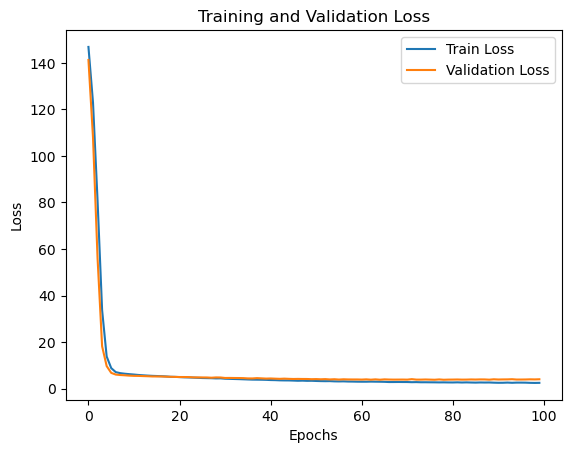

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Step 1: Generate the synthetic dataset
np.random.seed(42)

n_samples = 1000

# Generating synthetic features
engine_size = np.random.uniform(1.0, 6.0, n_samples)  # Engine size between 1L to 6L
weight = np.random.uniform(1000, 5000, n_samples)     # Vehicle weight in kg
cylinders = np.random.choice([4, 6, 8], n_samples)    # Number of cylinders: 4, 6, or 8
horsepower = np.random.uniform(70, 400, n_samples)    # Horsepower
city_mpg = np.random.uniform(10, 40, n_samples)       # City miles per gallon
highway_mpg = np.random.uniform(15, 50, n_samples)    # Highway miles per gallon

# Generate fuel consumption with some added noise
fuel_consumption = (weight * 0.002 + engine_size * 1.2 + cylinders * 0.5 - horsepower * 0.02
                    - city_mpg * 0.4 - highway_mpg * 0.3 + np.random.normal(0, 2, n_samples))

# Create a DataFrame
data = pd.DataFrame({
    'Engine_Size': engine_size,
    'Weight': weight,
    'Cylinders': cylinders,
    'Horsepower': horsepower,
    'City_MPG': city_mpg,
    'Highway_MPG': highway_mpg,
    'Fuel_Consumption': fuel_consumption
})

# Step 2: Prepare the data for training
X = data.drop(columns=['Fuel_Consumption'])
y = data['Fuel_Consumption']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Build the deep learning model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input layer and first hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(16, activation='relu'),  # Third hidden layer
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Step 5: Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss (Mean Squared Error): {test_loss}')

# Step 6: Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 2: Calculate metrics

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Step 3: Print the calculated metrics
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'R-squared (R²): {r2:.3f}')


7/7 [==============================] - 0s 1ms/step
Mean Absolute Error (MAE): 1.654
Mean Squared Error (MSE): 4.632
Root Mean Squared Error (RMSE): 2.152
R-squared (R²): 0.869


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from time import time
import warnings
warnings.filterwarnings("ignore")
# Step 1: Build a More Complex Model
model_complex = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Increased neurons
    BatchNormalization(),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the complex model
model_complex.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train the complex model
history_complex = model_complex.fit(X_train, y_train, 
                                    validation_split=0.2, 
                                    epochs=100, 
                                    batch_size=32, 
                                    callbacks=[early_stop], 
                                    verbose=1)

# Step 2: Save the model
model_complex.save('complex_model.h5')

# Evaluate the complex model
y_pred_complex = model_complex.predict(X_test)

# Calculate performance metrics for complex model
mae_complex = mean_absolute_error(y_test, y_pred_complex)
mse_complex = mean_squared_error(y_test, y_pred_complex)
rmse_complex = np.sqrt(mse_complex)
r2_complex = r2_score(y_test, y_pred_complex)

print(f'Complex Model - MAE: {mae_complex:.3f}, MSE: {mse_complex:.3f}, RMSE: {rmse_complex:.3f}, R2: {r2_complex:.3f}')


Epoch 1/100
20/20 [==============================] - 2s 13ms/step - loss: 138.8243 - val_loss: 151.3457
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 97.6211 - val_loss: 134.8833
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 62.8993 - val_loss: 109.6532
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 36.3058 - val_loss: 81.0243
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 24.1274 - val_loss: 57.0577
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 15.4710 - val_loss: 41.6446
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 13.2990 - val_loss: 31.7902
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 10.5162 - val_loss: 24.7682
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 10.6408 - val_loss: 20.7198
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 9.2294 - val

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
274,5,131.0,103.0,2830,15.9,78,2
157,8,350.0,145.0,4440,14.0,75,1
173,4,119.0,97.0,2545,17.0,75,3
357,4,119.0,100.0,2615,14.8,81,3
263,6,231.0,165.0,3445,13.4,78,1


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 13057 (51.00 KB)
Trainable params: 13057 (51.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None

Epoch 1/200

4/4 [==============================] - 2s 3ms/step - loss: 626.2018 - mean_absolute_error: 23.7525 - mean_squared_error: 626.2018
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 612.9280 - mean_absolute_error: 23.4789 - mean_squared_error: 612.9280
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 601.7225 - mean_absolute_error: 23.2412 - mean_squared_error: 601.7225
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 588.5402 - mean_absolute_error: 22.9592 - mean_squared_error: 588.5402
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 571.4760 - mean_absolute_error: 22.5901 - mean_squared_error: 571.4760
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 546.3657 - mean_absolute_error: 22.0288 - mean_squared_error: 546.3657
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 509.0315 - mean_absolute_error: 21.1842 - mean_squared_error: 509.0315
Epoch

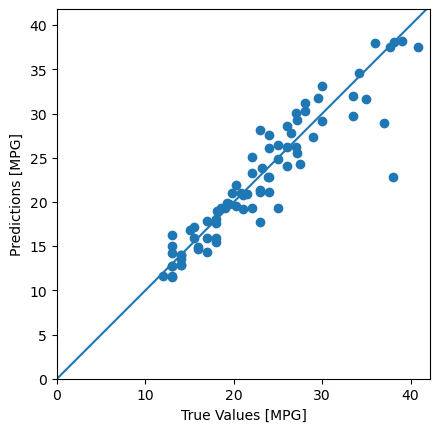

RMSE:  2.7921983275986255
R_square: 0.8569541922207026
1/1 [==============================] - 0s 72ms/step
[[24.747728]]
1/1 [==============================] - 0s 21ms/step
[[17.281668]]


In [8]:
# Final code
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import sklearn
import numpy as np
from sklearn.metrics import (mean_squared_error, mean_absolute_error,r2_score)
import pickle

physical_devices = tf.config.list_physical_devices('GPU') 
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

df = pd.read_csv("https://raw.githubusercontent.com/pydeveloperashish/Fuel-Efficiency-Prediction-using-ANN/refs/heads/main/Dataset.txt",na_values='?')
print(df.shape)
display(df.head())
df.dropna(inplace=True)
df.drop(['car name'],axis=1,inplace=True)
X=df.drop("mpg",axis=1)
Y=df['mpg']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

display(X_train.head())

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)


pickle.dump(sc, open(r'scaler.pkl', 'wb'))

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 64,activation='relu',input_shape=[len(X_train.keys())]))
# Adding the second hidden layer
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units=1))
# Adding the output layer

# Compiling the ANN
model.compile(loss='mean_squared_error',
                optimizer='Adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

display(model.summary())

# Fitting the ANN to the Training set
model_history=model.fit(X_train_std, Y_train, batch_size = 100,epochs = 200)

prediction = model.predict(X_test_std)


plt.scatter(Y_test,prediction)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()


model.save(r"model.h5")


rmse=np.sqrt(mean_squared_error(Y_test,prediction))

print('RMSE: ',rmse)

print('R_square:', r2_score(Y_test,prediction))
from pickle import load

Model = load_model('model.h5')
list1=[[4,97,100,5000,14.5,70,3]]
sc = load(open('scaler.pkl', 'rb'))
list1=sc.transform(list1)
prediction2=Model.predict(list1)
print(prediction2)

list2=[[8,307,130,3504,12,70,1]]
list2=sc.transform(list2)
prediction3=Model.predict(list2)
print(prediction3)


(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
274,5,131.0,103.0,2830,15.9,78,2
157,8,350.0,145.0,4440,14.0,75,1
173,4,119.0,97.0,2545,17.0,75,3
357,4,119.0,100.0,2615,14.8,81,3
263,6,231.0,165.0,3445,13.4,78,1


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                512       
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 13057 (51.00 KB)
Trainable params: 13057 (51.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None

Epoch 1/200
3/3 [==============================] - 1s 103ms/step - loss: 613.1005 - mean_absolute_error: 23.4698 - mean_squared_error: 613.1005 - val_loss: 582.9785 - val_mean_absolute_error: 22.7999 - val_mean_squared_error: 582.9785
Epoch 2/200
3/3 [==============================] - 0s 16ms/step - loss: 600.2343 - mean_absolute_error: 23.1864 - mean_squared_error: 600.2343 - val_loss: 568.2162 - val_mean_absolute_error: 22.4641 - val_mean_squared_error: 568.2162
Epoch 3/200
3/3 [==============================] - 0s 16ms/step - loss: 584.6788 - mean_absolute_error: 22.8281 - mean_squared_error: 584.6788 - val_loss: 549.1589 - val_mean_absolute_error: 22.0185 - val_mean_squared_error: 549.1589
Epoch 4/200
3/3 [==============================] - 0s 17ms/step - loss: 564.1146 - mean_absolute_error: 22.3554 - mean_squared_error: 564.1146 - val_loss: 524.3907 - val_mean_absolute_error: 21.4243 - val_mean_squared_error: 524.3907
Epoch 5/200
3/3 [==============================] - 0s 16ms/step

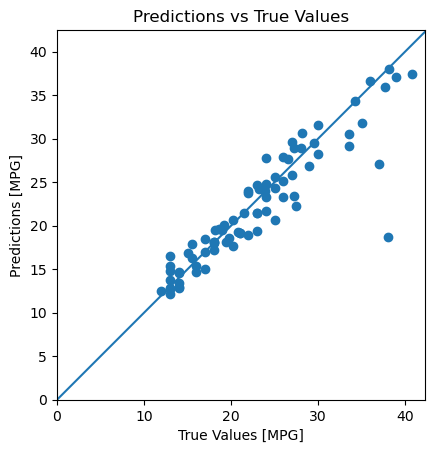

1/1 [==============================] - 0s 66ms/step
Predicted MPG for input [[-0.83920747 -0.90454337 -0.0995444   2.42535646 -0.37958917 -1.62933005
   1.72878276]]: 25.733
1/1 [==============================] - 0s 20ms/step
Predicted MPG for input [[ 1.52188861  1.11446083  0.67615842  0.64959007 -1.27103134 -1.62933005
  -0.74203461]]: 17.292


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import sklearn
import numpy as np
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score)
import pickle

# Check for GPU
physical_devices = tf.config.list_physical_devices('GPU') 
# Uncomment if you want to enable memory growth for GPU
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/pydeveloperashish/Fuel-Efficiency-Prediction-using-ANN/refs/heads/main/Dataset.txt", na_values='?')
print(df.shape)
display(df.head())

# Data preprocessing
df.dropna(inplace=True)
df.drop(['car name'], axis=1, inplace=True)
X = df.drop("mpg", axis=1)
Y = df['mpg']

# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

# Display first few rows of training data
display(X_train.head())

# Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Save the scaler
pickle.dump(sc, open('scaler.pkl', 'wb'))

# Initialize the ANN
model = Sequential()

# Adding layers to the ANN
model.add(Dense(units=64, activation='relu', input_shape=[len(X_train.keys())]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1))  # Output layer

# Compiling the ANN
model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['mean_absolute_error', 'mean_squared_error'])

# Display model summary
display(model.summary())

# Fitting the ANN to the Training set
model_history = model.fit(X_train_std, Y_train, batch_size=100, epochs=200, validation_split=0.2)

# Predicting on the test set
predictions = model.predict(X_test_std)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

# Print evaluation metrics
print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'MSE: {mse:.3f}')
print(f'R²: {r2:.3f}')

# Plotting predictions vs true values
plt.scatter(Y_test, predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.title('Predictions vs True Values')
plt.show()

# Save the model
model.save("model.h5")

# Load the model for inference
model_loaded = load_model('model.h5')

# Inference on new data points
sc = load(open('scaler.pkl', 'rb'))

# Example input for prediction
list1 = [[4, 97, 100, 5000, 14.5, 70, 3]]  # Example features
list1 = sc.transform(list1)  # Standardize the features
prediction1 = model_loaded.predict(list1)
print(f'Predicted MPG for input {list1}: {prediction1[0][0]:.3f}')

# Another example input for prediction
list2 = [[8, 307, 130, 3504, 12, 70, 1]]  # Example features
list2 = sc.transform(list2)  # Standardize the features
prediction2 = model_loaded.predict(list2)
print(f'Predicted MPG for input {list2}: {prediction2[0][0]:.3f}')


In [10]:
import tensorflow as tf

# Load your Keras model
model = tf.keras.models.load_model("model.h5")

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model
with open("model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\A507658\AppData\Local\Temp\tmpa45acbcf\assets


INFO:tensorflow:Assets written to: C:\Users\A507658\AppData\Local\Temp\tmpa45acbcf\assets


In [13]:
sc.mean_,sc.var_

(array([5.42172524e+00, 1.91083067e+02, 1.03849840e+02, 2.95675080e+03,
        1.55645367e+01, 7.59904153e+01, 1.60063898e+00]),
 array([2.87007114e+00, 1.08184276e+04, 1.49572506e+03, 7.09727318e+05,
        7.86490849e+00, 1.35174800e+01, 6.55207259e-01]))

In [ ]:
arm-linux-gnueabi-gcc -o inference inference.c -I/path/to/tflite/include -L/path/to/tflite/lib -ltensorflowlite -lpthread -ldl


In [ ]:
aarch64-linux-gnu-g++ -o tflite_inference tflite_inference.cpp -I/path/to/tensorflow/lite -L/path/to/tensorflow/lite/lib -ltensorflowlite -pthread


In [14]:
import pickle

# Load the scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Extract means and scales
means = scaler.mean_.tolist()
scales = scaler.scale_.tolist()

# Save to text file
with open('scaler.txt', 'w') as f:
    f.write(','.join(map(str, means)) + '\n')  # Save means in the first line
    f.write(','.join(map(str, scales)) + '\n')  # Save scales in the second line


In [ ]:
aarch64-linux-gnu-g++ -o tflite_inference tflite_inference.cpp \
    -I/mnt/c/Users/A507658/Downloads/tensorflow/tensorflow/lite \
    -L/mnt/c/Users/A507658/Downloads/tensorflow/bazel-bin/tensorflow/lite \
    -ltensorflowlite -pthread



Dataset shape: (398, 9)
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin                    car name  
0          70       1  chevrolet chevelle malibu   
1          70       1           buick skylark 320  
2          70       1          plymouth satellite  
3          70       1               amc rebel sst  
4          70       1                 ford torino  
Linear Regression - RMSE: 3.289, MAE: 2.620, R²: 0.801
Random Forest - RMSE: 2.825, MAE: 1.893, R²: 0.854
Support Vector Regression - RMSE: 2.908, MAE: 1.967, R²: 0.845
Best model: Random Forest with RMSE: 2.825
Predicted MPG for input [[4, 97

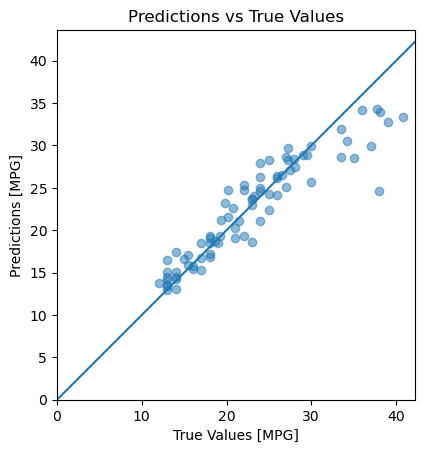

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/pydeveloperashish/Fuel-Efficiency-Prediction-using-ANN/refs/heads/main/Dataset.txt", na_values='?')
print("Dataset shape:", df.shape)
print(df.head())

# Data preprocessing
df.dropna(inplace=True)
df.drop(['car name'], axis=1, inplace=True)
X = df.drop("mpg", axis=1)
Y = df['mpg']

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Save the scaler for future use
pickle.dump(sc, open('scaler.pkl', 'wb'))

# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=101),
    'Support Vector Regression': SVR(kernel='rbf')
}

best_model = None
best_score = float('inf')
best_model_name = ""

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_std, Y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test_std)
    
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(Y_test, predictions))
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)

    # Print evaluation metrics
    print(f"{model_name} - RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")
    
    # Save the best model based on RMSE
    if rmse < best_score:
        best_score = rmse
        best_model_name = model_name
        best_model = model

# Save the best-performing model
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print(f"Best model: {best_model_name} with RMSE: {best_score:.3f}")

# Load the best model for inference
with open('best_model.pkl', 'rb') as model_file:
    best_model_loaded = pickle.load(model_file)

# Example input for prediction
example_input1 = [[4, 97, 100, 5000, 14.5, 70, 3]]  # Example features
example_input2 = [[8, 307, 130, 3504, 12, 70, 1]]  # Another example features

# Standardize the example inputs
example_input1_std = sc.transform(example_input1)
example_input2_std = sc.transform(example_input2)

# Predict MPG for the example inputs
prediction1 = best_model_loaded.predict(example_input1_std)
prediction2 = best_model_loaded.predict(example_input2_std)

print(f'Predicted MPG for input {example_input1}: {prediction1[0]:.3f}')
print(f'Predicted MPG for input {example_input2}: {prediction2[0]:.3f}')

# Plotting predictions vs true values
plt.scatter(Y_test, predictions, alpha=0.5)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.title('Predictions vs True Values')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()


In [16]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/pydeveloperashish/Fuel-Efficiency-Prediction-using-ANN/refs/heads/main/Dataset.txt", na_values='?')
df.dropna(inplace=True)
df.drop(['car name'], axis=1, inplace=True)
X = df.drop("mpg", axis=1)
Y = df['mpg']

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=101)
model.fit(X_train_std, Y_train)

# Save the model and the scaler
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)


In [22]:
X_train.iloc[0].to_list()

[5.0, 131.0, 103.0, 2830.0, 15.9, 78.0, 2.0]

In [23]:
y_train[0]

-2.408861969665304

In [24]:
import pickle
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Load the model
with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Define the initial types for the model inputs
initial_type = [('float_input', FloatTensorType([None, 7]))]  # 7 features

# Convert to ONNX format
onnx_model = convert_sklearn(model, initial_types=initial_type)

# Save to a file
with open('best_model.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())


In [25]:
aarch64-linux-gnu-g++ -o model_inference model_inference.cpp -I/home/phani/onnxruntime-linux-aarch64-1.18.0/include -L/home/phani/onnxruntime-linux-aarch64-1.18.0/lib -lonnxruntime


SyntaxError: invalid syntax (3933022697.py, line 1)

In [26]:
import onnx

# Load the ONNX model
model = onnx.load("best_model.onnx")

# Print input names
print("Input names:")
for input in model.graph.input:
    print(input.name)

# Print output names
print("Output names:")
for output in model.graph.output:
    print(output.name)


Input names:
float_input
Output names:
variable


In [27]:
import onnx

# Load your ONNX model
model = onnx.load("best_model.onnx")

# Print the input names
for input in model.graph.input:
    print(input.name)


float_input


In [28]:
import onnx

# Load the ONNX model
model_path = "best_model.onnx"  # Update with your actual model path
model = onnx.load(model_path)

# Get the model's input names
print("Input names:")
for input in model.graph.input:
    print(input.name)

# Get the model's output names
print("\nOutput names:")
for output in model.graph.output:
    print(output.name)


Input names:
float_input

Output names:
variable


In [ ]:
aarch64-linux-gnu-gcc -o test10 test1.cpp \
-I/home/phani/onnxruntime-linux-aarch64-1.18.0/include \
-L/home/phani/onnxruntime-linux-aarch64-1.18.0/lib \
-lonnxruntime -lstdc++